# <center>ASSIGNMENT 3<center>

<p>Team Name:Group 1
<p>Student Names:Kaden Larussa, Brooks Schafer, Nick Solari
<p>Student W#s:W0762283, w0711688, w0755643

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

Load "titanic.csv" into the data frame object "data"</br>
[train.csv](https://github.com/wesm/pydata-book/blob/2nd-edition/datasets/titanic/train.csv)

In [2]:
data = pd.read_csv("titanic.csv")

## Data Processing

Create a data frame object "pasUpto19".
> Columns of pasUpto19 = {AGE_12, AGE_TEEN, PCLASS}.<br>
> AGE_12 : Passengers with age in \[1, 12]<br>
> AGE_TEEN : Passengers with age in \[13, 19]<br>

In [3]:
data['AGE_12'] = (data['Age'] >= 1) & (data['Age'] <= 12)
data['AGE_TEEN'] = (data['Age'] >= 13) & (data['Age'] <= 19)

#passing data to a new dataframe
pasUpto19 = data[['AGE_12', 'AGE_TEEN', 'Pclass']]

Display 5 rows below and above the middle row of "pasUpto19":

In [4]:
#index of the middle row
middle_idx = len(pasUpto19) // 2

#extract 5 rows below and above the middle row
surrounding_rows = pasUpto19.iloc[middle_idx - 5: middle_idx + 6]



Group pasUpto19 by AGE_TEEN:

In [5]:
#self explanatory
grouped_by_age_teen = pasUpto19.groupby('AGE_TEEN').size()

grouped_by_age_teen


AGE_TEEN
False    796
True      95
dtype: int64

Get the mean of PCLASS for each group of AGE_TEEN and display the mean by age groups:

In [6]:
#calculate mean
mean_pclass_by_age_teen = pasUpto19.groupby('AGE_TEEN')['Pclass'].mean()

mean_pclass_by_age_teen

AGE_TEEN
False    2.291457
True     2.452632
Name: Pclass, dtype: float64

Sort "pasUpto19" by the age of teenages and store into a DF object "pasUpto19_sortTeen":

In [7]:
# Sort and display
pasUpto19_sortTeen = pasUpto19.sort_values(by='AGE_TEEN', ascending=False)
pasUpto19_sortTeen.head()


,AGE_12,AGE_TEEN,Pclass
686,False,True,3
84,False,True,2
385,False,True,2
550,False,True,1
389,False,True,2


## Summarize Data

Create "pasUpto19_stat" an object from the statistics of pasUpto19. Use the method describe(). Print the statistics.

In [8]:
# describe method
pasUpto19_stat = pasUpto19.describe()

# Display
pasUpto19_stat


,Pclass
count,891.000000
mean,2.308642
std,0.836071
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


Store each statistics of pasUpto19_stat into a multi-dimensional list "pasUpto19_stat_lst" individually. Print the list.

In [9]:

pasUpto19_stat_lst = pasUpto19_stat.values.tolist()

#display
pasUpto19_stat_lst


[[891.0],
 [2.308641975308642],
 [0.836071240977049],
 [1.0],
 [2.0],
 [3.0],
 [3.0],
 [3.0]]

Print rows where AGE_12 >= mean of AGE_12 or AGE_TEEN >= mean AGE_TEEN.

In [10]:
#calculate mean
mean_age_12 = pasUpto19['AGE_12'].mean()
mean_age_teen = pasUpto19['AGE_TEEN'].mean()

# filter
filtered_rows = pasUpto19[(pasUpto19['AGE_12'] >= mean_age_12) | (pasUpto19['AGE_TEEN'] >= mean_age_teen)]
#display
filtered_rows

,AGE_12,AGE_TEEN,Pclass
7,True,False,3
9,False,True,2
10,True,False,3
14,False,True,3
16,True,False,3
...,...,...,...
855,False,True,3
869,True,False,3
875,False,True,3
877,False,True,3


## Use of method "eval(Age ...)"

<b>Sample Code Snippet:</b><br>
<p>
df = pd.DataFrame({'A': range(1, 6), 'B': range(10, 0, -2)})

df.eval('C = A + B')
</p>

Get passengers whose age is in \[3,7) or in \[12, 15] and store into "pas3to6_12to15":

In [11]:
#filter (id rather use this instead of eval)
pas3to6_12to15 = data[((data['Age'] >= 3) & (data['Age'] < 7)) | 
                      ((data['Age'] >= 12) & (data['Age'] <= 15))]
#display
pas3to6_12to15

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AGE_12,AGE_TEEN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,True,False
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,False,True
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,False,True
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,False,True
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C,True,False
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S,True,False
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,True,False
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,False,True
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C,True,False


## Plots

Create a figure "Plots for Pclass and Age"<br>
Plot histograms for "PCLASS", "AGE_12", and "AGE_TEEN" side by side:

c:\Users\tax\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_axes.py:6791: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


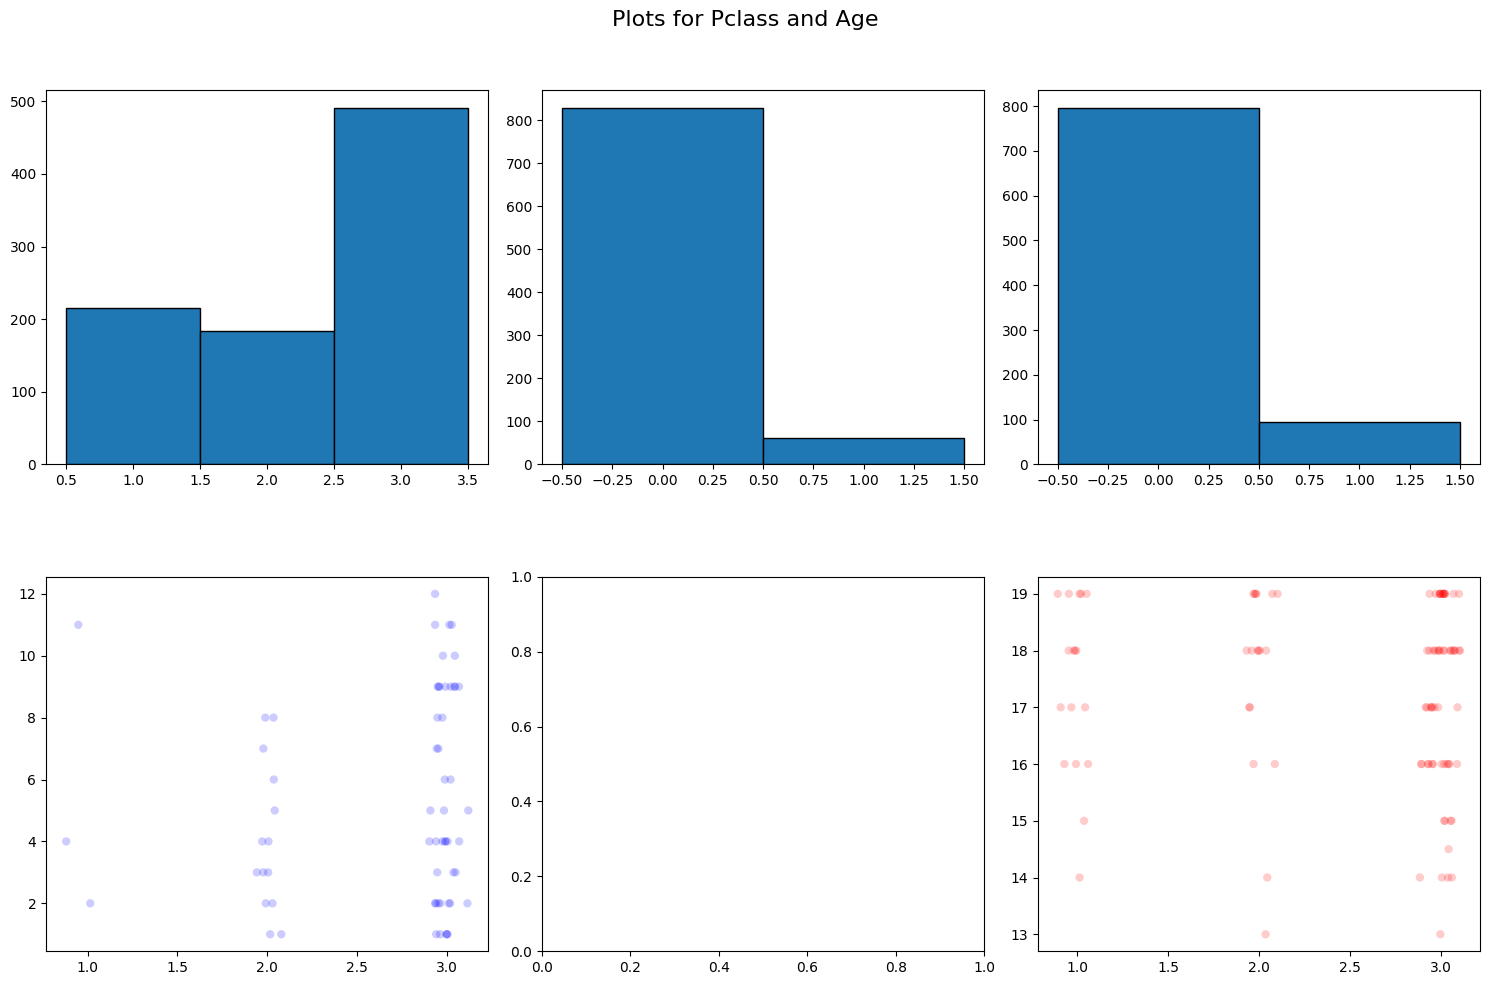

In [18]:


#filtering the ages from the original data
age_12_bool_index = pasUpto19['AGE_12'] == 1
age_teen_bool_index = pasUpto19['AGE_TEEN'] == 1
aligned_data = data.loc[pasUpto19.index]

ages_12 = aligned_data['Age'][age_12_bool_index]
pclass_12 = aligned_data['Pclass'][age_12_bool_index]
ages_teen = aligned_data['Age'][age_teen_bool_index]
pclass_teen = aligned_data['Pclass'][age_teen_bool_index]

# Adding jitter to the x-axis for the scatter plots
jitter_magnitude = 0.05
x_jitter_12 = np.random.randn(ages_12.shape[0]) * jitter_magnitude
x_jitter_teen = np.random.randn(ages_teen.shape[0]) * jitter_magnitude

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Plots for Pclass and Age", fontsize=16)

# First row histograms
axes[0, 0].hist(pasUpto19['Pclass'], bins=[1, 2, 3, 4], edgecolor="k", align='left')
axes[0, 1].hist(pasUpto19['AGE_12'], bins=[0, 1, 2], edgecolor="k", align='left')
axes[0, 2].hist(pasUpto19['AGE_TEEN'], bins=[0, 1, 2], edgecolor="k", align='left')

# Second row scatter plots with jitter
axes[1, 0].scatter(pclass_12 + x_jitter_12, ages_12, alpha=0.2, color='blue', edgecolor='none')
axes[1, 2].scatter(pclass_teen + x_jitter_teen, ages_teen, alpha=0.2, color='red', edgecolor='none')

# Adjust the layout and display the plots
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.3)
plt.show()


Add a scatter plot for "PCLASS" vs. "AGE_12" into the first cell and "PCLASS" vs. "AGE_TEEN" into the last cell on the same figure at the second row:

In [13]:
#all code for this step is in the previous cell, i just couldnt get it to run in different cells

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

https://pandas.pydata.org/docs/reference/index.html